In [903]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import issparse
import seaborn as sns
from sklearn.model_selection import train_test_split

## Load data into sentences and labels, split into training, validation, and test set. Report the data distribution in a table

In [904]:
smsSpamColFile = open("./a1-data/a1-data/SMSSpamCollection", "r")  
smsSpamCol = smsSpamColFile.readlines()
smsSpamColFile.close()

In [905]:
dataDict = {"sentences":[],"labels":[]}
for data in smsSpamCol:
    splitData = data.split("\t")
    dataDict["sentences"].append(splitData[1].split("\n")[0])
    dataDict["labels"].append(splitData[0])

In [906]:
smsDf = pd.DataFrame.from_dict(dataDict)
ll = smsDf["labels"]
smsDf['labels'] = smsDf.labels.map({'ham':0, 'spam':1})

In [907]:
smsDf.head()

,sentences,labels
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [908]:
X_train, X_test, y_train, y_test = train_test_split(smsDf["sentences"],smsDf["labels"], test_size=0.3)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.7 = 0.2

        sentences
labels           
0            4827
1             747


Text(0.5, 1.0, 'Data Distribution')

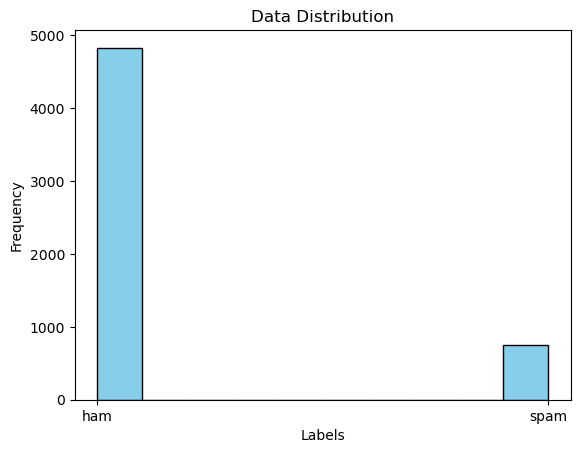

In [909]:
print(smsDf.groupby(['labels']).count())
plt.hist(ll,color='skyblue', edgecolor='black')
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.title('Data Distribution')

## Remove punctuation, urls, and numbers. Change text to lower case

In [910]:
import re
url_pattern = re.compile(r'https?://\S+|www\.\S+')
counter = 0
for label in smsDf["sentences"]:
    label = label.lower()                                              #Lower case
    text_without_punctuation = re.sub(r'[^\w\s]', '', label)           #Remove punctuations
    text_without_urls = url_pattern.sub("", text_without_punctuation)  #Remove urls
    text_without_numbers = re.sub(r'\d', '', text_without_urls)        #Remove numbers
    smsDf["sentences"][counter] = text_without_numbers
    counter = counter+1

C:\Users\Akshay\AppData\Local\Temp\ipykernel_15352\3977304183.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smsDf["sentences"][counter] = text_without_numbers


In [911]:
smsDf.head()

,sentences,labels
0,go until jurong point crazy available only in ...,0
1,ok lar joking wif u oni,0
2,free entry in a wkly comp to win fa cup final...,1
3,u dun say so early hor u c already then say,0
4,nah i dont think he goes to usf he lives aroun...,0


## Tokenize input text into tokens, including word stemming and removing stopwords.

In [912]:
# import nltk
# nltk.download('all')

In [913]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
porter_stemmer = PorterStemmer()
tokenizedWords = []
for label in smsDf["sentences"]:
    tokenizedWord = word_tokenize(label)                                    #Tokenize words
    stemmed_words = [porter_stemmer.stem(word) for word in tokenizedWord]   #Words stemming
    removedStopwords = [w for w in stemmed_words if not w in stop_words]    #Removing stopwords
#     print("Removed Stopwords",removedStopwords)
#     print("Words Stemming",stemmed_words)
#     print("Tokeinzed Words",tokenizedWord)
    tokenizedWords.append(removedStopwords)

smsDf["tokens"] = tokenizedWords

In [914]:
smsDf.head()

,sentences,labels,tokens
0,go until jurong point crazy available only in ...,0,"[go, jurong, point, crazi, avail, onli, bugi, ..."
1,ok lar joking wif u oni,0,"[ok, lar, joke, wif, u, oni]"
2,free entry in a wkly comp to win fa cup final...,1,"[free, entri, wkli, comp, win, fa, cup, final,..."
3,u dun say so early hor u c already then say,0,"[u, dun, say, earli, hor, u, c, alreadi, say]"
4,nah i dont think he goes to usf he lives aroun...,0,"[nah, dont, think, goe, usf, live, around, tho..."


## Feature extraction: build your TF-IDF feature extractor for the provided dataset (only use the training set).

In [915]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
# Create the vectorizer method
tfidf_vec = TfidfVectorizer()

# Transform the text into tf-idf vectors
text_tfidf = tfidf_vec.fit_transform(list(X_train))
X_test_a = tfidf_vec.transform(X_test)
X_val_a =tfidf_vec.transform(X_val)
#Convert to dense array
if issparse(text_tfidf):
    text_tfidf = text_tfidf.toarray()
if issparse(X_test_a):
    X_test_a = X_test_a.toarray()
if issparse(X_val_a):
    X_val_a = X_val_a.toarray()

In [916]:
from sklearn.preprocessing import MinMaxScaler

# Assuming X_tfidf is your TF-IDF feature matrix
scaler = MinMaxScaler()
scaler.fit(text_tfidf)

# Transform the training set
text_tfidf = scaler.transform(text_tfidf)

# Transform the validation and test sets using the same scaler
X_val_a = scaler.transform(X_val_a)
X_test_a = scaler.transform(X_test_a)

In [917]:
# from sklearn.linear_model import LogisticRegression
# classifier = LogisticRegression()
# classifier.fit(text_tfidf, y_train)
# w = classifier.coef_[0]
# b = classifier.intercept_[0]
# print(w,b)
# X_test_a = tfidf_vec.transform(X_test)
# predictions = classifier.predict(X_test_a)
# print(predictions)

In [918]:
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# from sklearn.metrics import confusion_matrix 
# print('Accuracy score: ', format(accuracy_score(y_test, predictions)))
# print('Precision score: ', format(precision_score(y_test, predictions)))
# print('Recall score: ', format(recall_score(y_test, predictions)))
# print('F1 score: ', format(f1_score(y_test, predictions)))
# print('\nConfusion Matrix :\n', confusion_matrix(y_test, predictions)) 

## Implement this Logistic Regression model. This step includes writing code for initial-ization, objective function, gradient, and gradient descent.

In [919]:
def sigmoid(z):
#     print(1 / (1 + np.exp(-z)))
    return 1 / (1 + np.exp(-z))
def objective_function(X, y, w, b,regularization):
    m = len(y)
    z = np.dot(X, w) + b
    y_hat = sigmoid(z)
    loss = - (1/m) * np.sum(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)) + (regularization * np.sum(w**2))
    return loss

In [920]:
def gradient(X, y, w, b,regularization_param):
    m = len(y)
    z = np.dot(X, w) + b
    y_hat = sigmoid(z)
    dw = (1/m) * np.dot(X.T, y_hat - y) + 2*regularization_param*w
    db = (1/m) * np.sum(y_hat - y)

    return dw, db

In [921]:
def gradient_descent(X, y, w, b, learning_rate, num_iterations,regularization_param):
    lossDict = {"iterations":[],"loss":[]}
    for i in range(num_iterations):
        dw, db = gradient(X, y, w, b,regularization_param)
        w -= learning_rate * dw
        b -= learning_rate * db
        
        if i % 100 == 0:
            loss = objective_function(X, y, w, b,regularization_param)
            lossDict["iterations"].append(i)
            lossDict["loss"].append(loss) 
            print(f"Iteration {i}, Loss: {loss}")

    return lossDict, w, b

In [922]:
num_features = text_tfidf.shape[1]
w = np.zeros((num_features, 1))
y_train_1 = y_train.to_numpy().reshape(-1,1)
b = 0

    
# plt.plot(y_train)
# print(y_train_1)
# print(w.shape)
# z = np.dot(text_tfidf, w)
# prec = LogisticRegression()
# print(z.shape)
# print(1 / (1 + np.exp(-z)))
# prec.fit(text_tfidf, y_train)
# wieght = prec.coef_[0]
# z = np.dot(text_tfidf, w) + b
# y_hat = sigmoid(z)
# print(text_tfidf.T.shape)
# print(y_hat.shape)

# print(y_train_1.shape)
# m = len(y_train_1)
# print(m)
# dw = (1/m) * np.dot(text_tfidf.T, y_hat - y_train_1)

In [923]:
def accuracy(y_true, y_pred):
    """
    Compute accuracy.
    """
    true_positive = np.sum((y_true == 1) & (y_pred == 1))
    true_negative = np.sum((y_true == 0) & (y_pred == 0))
    total_examples = len(y_true)
    accuracy_value = (true_positive+true_negative) / total_examples
    return accuracy_value

def precision(y_true, y_pred):
    """
    Compute precision.
    """
    true_positive = np.sum((y_true == 1) & (y_pred == 1))
    false_positive = np.sum((y_true == 0) & (y_pred == 1))
    precision_value = true_positive / (true_positive + false_positive)
    return precision_value

def recall(y_true, y_pred):
    """
    Compute recall.
    """
    true_positive = np.sum((y_true == 1) & (y_pred == 1))
    false_negative = np.sum((y_true == 1) & (y_pred == 0))
    recall_value = true_positive / (true_positive + false_negative)
    return recall_value

def f1_score(y_true, y_pred):
    """
    Compute F1 score.
    """
    precision_value = precision(y_true, y_pred)
    recall_value = recall(y_true, y_pred)
    f1_score_value = 2 * (precision_value * recall_value) / (precision_value + recall_value)
    return f1_score_value

In [924]:
def evaluate_model(y_true, y_pred):
    return accuracy(y_true, y_pred),precision(y_true, y_pred),recall(y_true, y_pred),f1_score(y_true, y_pred)

In [925]:
def stochastic_gradient_descent(X, y, w, b, learning_rate, num_iterations, regularization_param):
    lossDict = {"iterations": [], "loss": []}
    m = len(y)

    for i in range(num_iterations):
        random_index = np.random.randint(0, m)  # Select a random sample
        X_random = X[random_index, :].reshape(1, -1)
        y_random = y[random_index]
        dw, db = gradient(X_random, y_random, w, b, regularization_param)
        w -= learning_rate * dw
        b -= learning_rate * db

        if i % 100 == 0:
            loss = objective_function(X, y, w, b,regularization_param)
            lossDict["iterations"].append(i)
            lossDict["loss"].append(loss)
            print(f"Iteration {i}, Loss: {loss}")

    return lossDict, w, b


In [926]:
import random
def generate_mini_batches(X, y, batch_size):
    m = len(y)
    indices = np.arange(m)
    np.random.shuffle(indices)  # Shuffle the indices to randomize the order
    random_integer = random.randint(1, m-batch_size)    
    batch_indices = indices[random_integer:random_integer+batch_size]
    X_batch = X[batch_indices, :]  # Use NumPy array slicing
    y_batch = y[batch_indices]   
    return X_batch, y_batch

In [927]:
def mini_batch_gradient_descent(X, y, w, b, learning_rate, num_iterations, regularization_param, batch_size):
    lossDict = {"iterations": [], "loss": []}
    m = len(y)
    
    for i in range(num_iterations):
        X_batch, y_batch = generate_mini_batches(text_tfidf, y_train_1, batch_size)
        dw, db = gradient(X_batch, y_batch, w, b, regularization_param)
        w -= learning_rate * dw
        b -= learning_rate * db

        if i % 100 == 0:
            loss = objective_function(X, y, w, b, regularization_param)
            lossDict["iterations"].append(i)
            lossDict["loss"].append(loss)
            print(f"Iteration {i}, Loss: {loss}")

    return lossDict, w, b


In [928]:
# Set hyperparameters
learning_rate = 0.001
num_iterations = 10000
regularization_param = 0.01
batch_size = 100
# Apply gradient descent
lossDict_1,w1, b1 = gradient_descent(text_tfidf, y_train_1, w, b, learning_rate, num_iterations,regularization_param)
lossDict_3, w3, b3 = mini_batch_gradient_descent(text_tfidf, y_train_1, w, b, learning_rate, num_iterations, regularization_param, batch_size)
lossDict_2, w2, b2 = stochastic_gradient_descent(text_tfidf, y_train_1, w, b, learning_rate, num_iterations, regularization_param)

Iteration 0, Loss: 0.6930019201342775
Iteration 100, Loss: 0.6788616571211871
Iteration 200, Loss: 0.6654577467240642
Iteration 300, Loss: 0.6527503707396545
Iteration 400, Loss: 0.6407014875105207
Iteration 500, Loss: 0.6292748327345695
Iteration 600, Loss: 0.6184359043077039
Iteration 700, Loss: 0.6081519339885362
Iteration 800, Loss: 0.5983918483977746
Iteration 900, Loss: 0.5891262215857934
Iteration 1000, Loss: 0.5803272211292158
Iteration 1100, Loss: 0.5719685494576248
Iteration 1200, Loss: 0.5640253818692204
Iteration 1300, Loss: 0.5564743024719893
Iteration 1400, Loss: 0.5492932390860774
Iteration 1500, Loss: 0.5424613979637797
Iteration 1600, Loss: 0.5359591990254025
Iteration 1700, Loss: 0.5297682121711592
Iteration 1800, Loss: 0.5238710951098763
Iteration 1900, Loss: 0.5182515330430145
Iteration 2000, Loss: 0.5128941804557162
Iteration 2100, Loss: 0.5077846051935853
Iteration 2200, Loss: 0.5029092349430855
Iteration 2300, Loss: 0.4982553061832751
Iteration 2400, Loss: 0.4938

Iteration 0, Loss: 0.614842493692754
Iteration 100, Loss: 0.6023416823788418
Iteration 200, Loss: 0.5913313703280403
Iteration 300, Loss: 0.5819686066714975
Iteration 400, Loss: 0.5725537710582169
Iteration 500, Loss: 0.5637575989615649
Iteration 600, Loss: 0.5542191670558321
Iteration 700, Loss: 0.5478656852755135
Iteration 800, Loss: 0.5392054587588041
Iteration 900, Loss: 0.5319317545740959
Iteration 1000, Loss: 0.5245164146882102
Iteration 1100, Loss: 0.5181649560939455
Iteration 1200, Loss: 0.51150985506927
Iteration 1300, Loss: 0.5051473304259753
Iteration 1400, Loss: 0.49908322438933833
Iteration 1500, Loss: 0.4932601354361309
Iteration 1600, Loss: 0.4883417271614453
Iteration 1700, Loss: 0.4847471593134402
Iteration 1800, Loss: 0.47971720373853605
Iteration 1900, Loss: 0.4757351479753317
Iteration 2000, Loss: 0.4724229429259558
Iteration 2100, Loss: 0.46943305093643933
Iteration 2200, Loss: 0.46450334974542157
Iteration 2300, Loss: 0.4611191336128547
Iteration 2400, Loss: 0.456

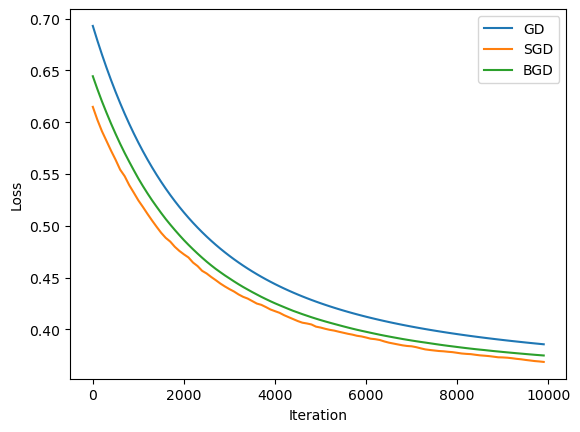

In [929]:
plt.plot(lossDict_1["iterations"],lossDict_1["loss"],label='GD')
plt.plot(lossDict_2["iterations"],lossDict_2["loss"],label='SGD')
plt.plot(lossDict_3["iterations"],lossDict_3["loss"],label='BGD')
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [930]:
def predict(X, w, b):
    z = np.dot(X, w) + b
    y_pred = 1 / (1 + np.exp(-z))
#     plt.plot(y_pred)
    return (y_pred >= np.mean(y_pred)).astype(int)

In [931]:
y_pred_1 = predict(X_test_a,w1,b1)
y_pred_2 = predict(X_test_a,w2,b2)
y_pred_3 = predict(X_test_a,w3,b3)

In [932]:
y_test_1 = y_test.to_numpy().reshape(-1,1)
accuracyL = []
precisionL = []
recallL = []
f1L = []
predList = [y_pred_1,y_pred_2,y_pred_3]
for i in predList:
    aS,prS,recS,f1S = evaluate_model(y_test_1,i)
    accuracyL.append(aS)
    precisionL.append(prS)
    recallL.append(recS)
    f1L.append(f1S)
evaludationDf = pd.DataFrame()
evaludationDf["Optimization"] = ["GD","SGD","mini-BGD"]
evaludationDf["accuracy"] = accuracyL
evaludationDf["precision"] = precisionL
evaludationDf["recall"] = recallL
evaludationDf["f1"] = f1L

In [933]:
evaludationDf.head()

,Optimization,accuracy,precision,recall,f1
0,GD,0.716677,0.316327,0.977477,0.477974
1,SGD,0.714883,0.314949,0.977477,0.476400
2,mini-BGD,0.716079,0.315866,0.977477,0.477448


## Cross-validation: Use cross-validation to choose the best λ using the validation set.

In [940]:
learning_rate = 0.001
num_iterations = 10000
batch_size = 100
GDL = []
SGDL = []
BGDL = []
# Define a range of λ values to test
lambda_values = [0.001, 0.1, 1, 10]
y_val_1 = y_val.to_numpy().reshape(-1,1)
# Loop over λ values
for reg_param in lambda_values:
    # Apply gradient descent with the current λ on the training set
#     lossDict_1,w1, b1 = gradient_descent(text_tfidf, y_train_1, w, b, learning_rate, num_iterations,regularization_param)
    lossDict_2, w2, b2 = stochastic_gradient_descent(text_tfidf, y_train_1, w, b, learning_rate, num_iterations, regularization_param)
    lossDict_3, w3, b3 = mini_batch_gradient_descent(text_tfidf, y_train_1, w, b, learning_rate, num_iterations, regularization_param, batch_size)
    # Validate on the validation set and calculate metrics (e.g., accuracy, precision, recall, F1)
    y_pred_val_1 = predict(X_val_a, w1, b1)
    y_pred_val_2 = predict(X_val_a, w2, b2)
    y_pred_val_3 = predict(X_val_a, w3, b3)
    # Store or print the performance metrics for this λ value
#     print("Regularization Parameter: {}".format(reg_param))
    accuracy_val,precision_val,recall_val,f1_val = evaluate_model(y_val_1,y_pred_val_1)
    GDL.append([accuracy_val,precision_val,recall_val,f1_val])
#     print(f"Optmization: GD, Accuracy: {accuracy_val}, Precision: {precision_val}, Recall: {recall_val}, F1: {f1_val}")
    accuracy_val,precision_val,recall_val,f1_val = evaluate_model(y_val_1,y_pred_val_2)
    SGDL.append([accuracy_val,precision_val,recall_val,f1_val])
#     print(f"Optmization: SGD, Accuracy: {accuracy_val}, Precision: {precision_val}, Recall: {recall_val}, F1: {f1_val}")
    accuracy_val,precision_val,recall_val,f1_val = evaluate_model(y_val_1,y_pred_val_3)
    BGDL.append([accuracy_val,precision_val,recall_val,f1_val])
#     print(f"Optmization: Mini-BGD, Accuracy: {accuracy_val}, Precision: {precision_val}, Recall: {recall_val}, F1: {f1_val}")
#     print()

Iteration 0, Loss: 0.5597682412112079
Iteration 100, Loss: 0.5528659143453409
Iteration 200, Loss: 0.5457573501281904
Iteration 300, Loss: 0.537138558125554
Iteration 400, Loss: 0.5293488295923308
Iteration 500, Loss: 0.521808400268888
Iteration 600, Loss: 0.5157061754754486
Iteration 700, Loss: 0.5103766212151888
Iteration 800, Loss: 0.5044310665983455
Iteration 900, Loss: 0.4979769743940417
Iteration 1000, Loss: 0.4921869492300513
Iteration 1100, Loss: 0.4881080084634959
Iteration 1200, Loss: 0.4837126666285576
Iteration 1300, Loss: 0.48030251170277316
Iteration 1400, Loss: 0.47569394670545617
Iteration 1500, Loss: 0.4715582915172971
Iteration 1600, Loss: 0.4683568933109078
Iteration 1700, Loss: 0.46319471521226113
Iteration 1800, Loss: 0.459430953183073
Iteration 1900, Loss: 0.45522805378625536
Iteration 2000, Loss: 0.45236729286030997
Iteration 2100, Loss: 0.4484653261370887
Iteration 2200, Loss: 0.4452442984136018
Iteration 2300, Loss: 0.44243785304508004
Iteration 2400, Loss: 0.4

Iteration 9900, Loss: 0.36848148978820583
Iteration 0, Loss: 0.5590145414907036
Iteration 100, Loss: 0.5521019100644445
Iteration 200, Loss: 0.5452369758651375
Iteration 300, Loss: 0.538414146046282
Iteration 400, Loss: 0.5311621424798969
Iteration 500, Loss: 0.5242936623908889
Iteration 600, Loss: 0.5186861134846291
Iteration 700, Loss: 0.5131902629525802
Iteration 800, Loss: 0.5064232661472187
Iteration 900, Loss: 0.5000088650780288
Iteration 1000, Loss: 0.4940774284699868
Iteration 1100, Loss: 0.48890260686127907
Iteration 1200, Loss: 0.4843119945181814
Iteration 1300, Loss: 0.4796466647516762
Iteration 1400, Loss: 0.4752672765090201
Iteration 1500, Loss: 0.47137627486993705
Iteration 1600, Loss: 0.4674025549628793
Iteration 1700, Loss: 0.4633218061163452
Iteration 1800, Loss: 0.460140913601194
Iteration 1900, Loss: 0.456923275343204
Iteration 2000, Loss: 0.45298525945028595
Iteration 2100, Loss: 0.44926279893183413
Iteration 2200, Loss: 0.4460763281032539
Iteration 2300, Loss: 0.44

Iteration 9800, Loss: 0.3690414938490988
Iteration 9900, Loss: 0.36876632975740425
Iteration 0, Loss: 0.5587286456213625
Iteration 100, Loss: 0.5503359974259991
Iteration 200, Loss: 0.5423351432377369
Iteration 300, Loss: 0.5342393409314099
Iteration 400, Loss: 0.5278649733296649
Iteration 500, Loss: 0.520397807754577
Iteration 600, Loss: 0.5134022871112647
Iteration 700, Loss: 0.5077980098263134
Iteration 800, Loss: 0.5017910877318674
Iteration 900, Loss: 0.4957894302299335
Iteration 1000, Loss: 0.4905687436431298
Iteration 1100, Loss: 0.4867785472663466
Iteration 1200, Loss: 0.4816839792939286
Iteration 1300, Loss: 0.4776448899361624
Iteration 1400, Loss: 0.47241275914938397
Iteration 1500, Loss: 0.46817660093615154
Iteration 1600, Loss: 0.46477815236169495
Iteration 1700, Loss: 0.4612941472329113
Iteration 1800, Loss: 0.4577544876427744
Iteration 1900, Loss: 0.4553834629481345
Iteration 2000, Loss: 0.45253170209387367
Iteration 2100, Loss: 0.4499169838100906
Iteration 2200, Loss: 0.

Iteration 9700, Loss: 0.36973674562211967
Iteration 9800, Loss: 0.3694349136149945
Iteration 9900, Loss: 0.36916970922242587
Iteration 0, Loss: 0.5580052537327977
Iteration 100, Loss: 0.5493098666326932
Iteration 200, Loss: 0.5410368287670131
Iteration 300, Loss: 0.5339795746061122
Iteration 400, Loss: 0.5277091601822652
Iteration 500, Loss: 0.5213139357982548
Iteration 600, Loss: 0.5134034661132617
Iteration 700, Loss: 0.5070470900944728
Iteration 800, Loss: 0.500796386322004
Iteration 900, Loss: 0.4964834318787678
Iteration 1000, Loss: 0.49317472764575365
Iteration 1100, Loss: 0.4883767703001986
Iteration 1200, Loss: 0.4831156554153782
Iteration 1300, Loss: 0.478456011594462
Iteration 1400, Loss: 0.47453453621400715
Iteration 1500, Loss: 0.47027621370782724
Iteration 1600, Loss: 0.46878291467801825
Iteration 1700, Loss: 0.46499836095652997
Iteration 1800, Loss: 0.4614719937620033
Iteration 1900, Loss: 0.4571479357945838
Iteration 2000, Loss: 0.4540894244631715
Iteration 2100, Loss: 0

Iteration 9600, Loss: 0.37030738315958156
Iteration 9700, Loss: 0.37003031982862855
Iteration 9800, Loss: 0.3697576689640189
Iteration 9900, Loss: 0.3694785176765143


In [941]:
SGDL

[[0.7551229508196722, 0.3445378151260504, 0.9609375, 0.5072164948453608],
 [0.7633196721311475, 0.3524355300859599, 0.9609375, 0.5157232704402517],
 [0.7612704918032787, 0.3504273504273504, 0.9609375, 0.5135699373695198],
 [0.7581967213114754, 0.3474576271186441, 0.9609375, 0.5103734439834026]]

In [942]:
column_names = ["0.001","0.01", "0.1", "1"]

# Create DataFrames
GDL_df = pd.DataFrame(GDL, columns=column_names)
SGDL_df = pd.DataFrame(SGDL, columns=column_names)
BGDL_df = pd.DataFrame(BGDL, columns=column_names)

# Concatenate DataFrames along columns
# result_df = pd.concat([GDL_df.values.T, SGDL_df.values.T, BGDL_df.values.T], axis=1)

In [943]:
GDL_df = pd.DataFrame(GDL_df.values.T, columns=column_names, index=['GD_accuracy', 'GD_precision', 'GD_recall', 'GD_f1'])
SGDL_df = pd.DataFrame(SGDL_df.values.T, columns=column_names, index=['SGD_accuracy', 'SGD_precision','SGD_recall', 'SGD_f1'])
BGDL_df = pd.DataFrame(BGDL_df.values.T, columns=column_names, index=['BGD_accuracy', 'BGD_precision', 'BGD_recall', 'BGD_f1'])
result_df = pd.concat([GDL_df, SGDL_df, BGDL_df], axis=0)

In [944]:
result_df

,0.001,0.01,0.1,1
GD_accuracy,0.768443,0.767418,0.765369,0.765369
GD_precision,0.357558,0.356522,0.354467,0.354467
GD_recall,0.960938,0.960938,0.960938,0.960938
GD_f1,0.521186,0.520085,0.517895,0.517895
SGD_accuracy,0.755123,0.763320,0.761270,0.758197
SGD_precision,0.344538,0.352436,0.350427,0.347458
SGD_recall,0.960938,0.960938,0.960938,0.960938
SGD_f1,0.507216,0.515723,0.513570,0.510373
BGD_accuracy,0.756148,0.763320,0.759221,0.757172
BGD_precision,0.345506,0.352436,0.348442,0.346479


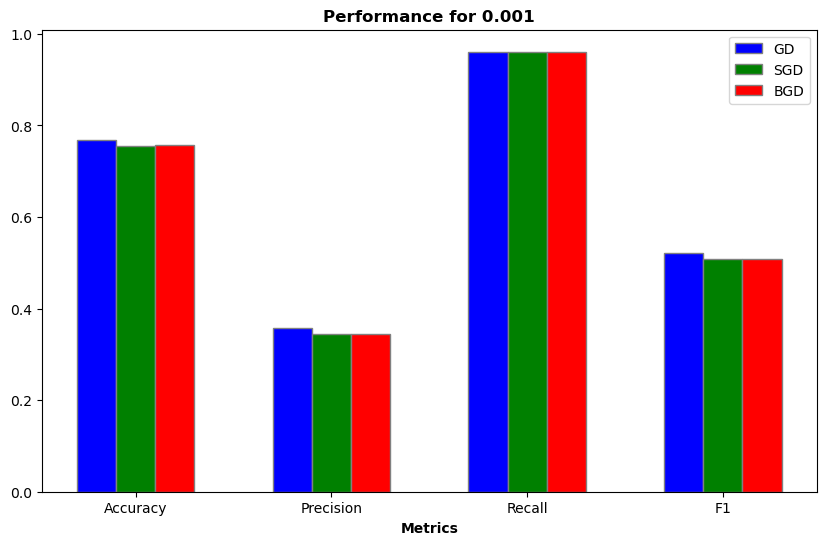

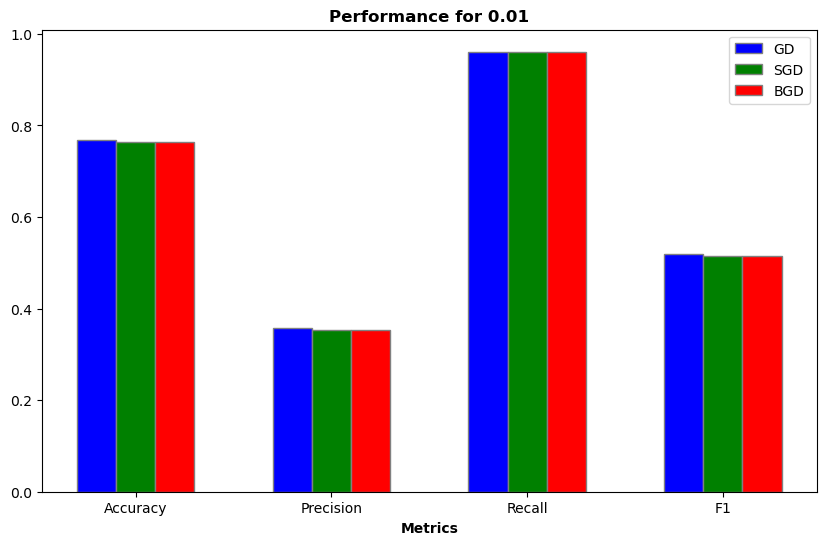

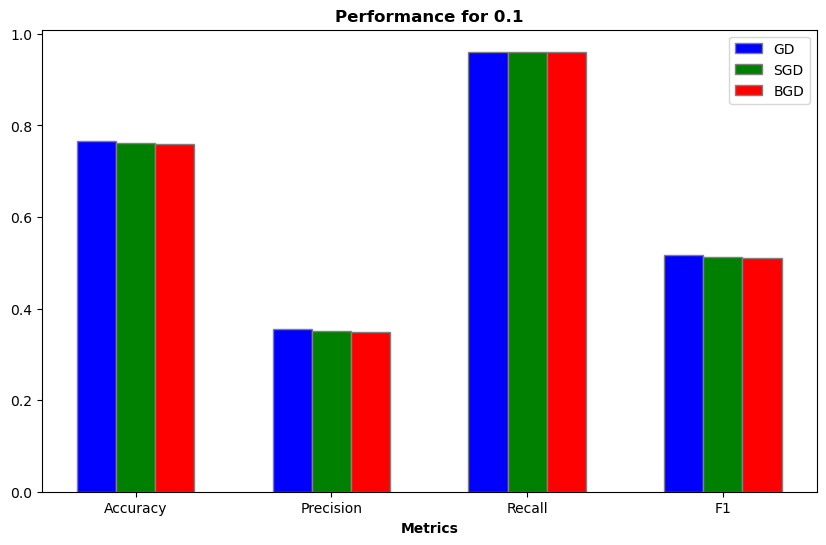

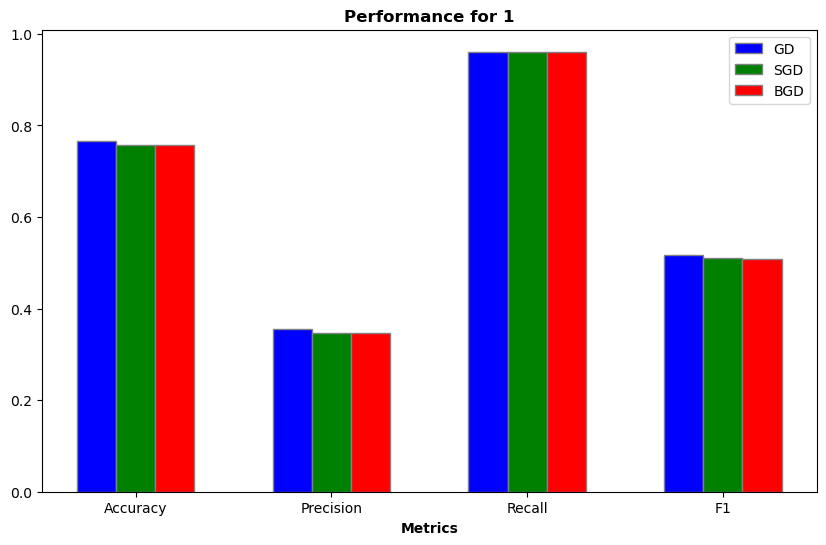

In [945]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming result_df is your DataFrame with the structure mentioned above

# Extract data for each optimization method
gd_data = result_df.loc[['GD_accuracy', 'GD_precision', 'GD_recall', 'GD_f1']]
sgd_data = result_df.loc[['SGD_accuracy', 'SGD_precision', 'SGD_recall', 'SGD_f1']]
bgd_data = result_df.loc[['BGD_accuracy', 'BGD_precision', 'BGD_recall', 'BGD_f1']]

# Set column names and values
columns = column_names

# Set width of the bars
bar_width = 0.2

# Set positions of bar on X axis
r1 = np.arange(len(columns))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Plotting
for i, column in enumerate(columns):
    plt.figure(figsize=(10, 6))
    plt.bar(r1, gd_data.loc[:, column], color='b', width=bar_width, edgecolor='grey', label='GD')
    plt.bar(r2, sgd_data.loc[:, column], color='g', width=bar_width, edgecolor='grey', label='SGD')
    plt.bar(r3, bgd_data.loc[:, column], color='r', width=bar_width, edgecolor='grey', label='BGD')
    
    plt.xlabel('Metrics', fontweight='bold')
    plt.xticks([r + bar_width for r in range(len(columns))], ['Accuracy', 'Precision', 'Recall', 'F1'])
    plt.title(f'Performance for {column}', fontweight='bold')
    plt.legend()
    plt.show()


#### Analyzing the results:

For all optimization methods (GD, SGD, BGD), the accuracy decreases as the regularization parameter (λ) increases.
BGD shows slightly better accuracy compared to GD and SGD for all λ values.
Precision:

Similar to accuracy, precision decreases with increasing λ for all optimization methods.
BGD again exhibits slightly better precision compared to GD and SGD across different λ values.
Recall:

The recall values remain constant across all optimization methods and λ values. This is expected, as recall focuses on true positive rate, which is not significantly impacted by changes in the regularization parameter.
F1 Score:

F1 score shows a decreasing trend with increasing λ for all optimization methods.
BGD tends to have a marginally higher F1 score compared to GD and SGD across different λ values.

#### Conclusion:

The choice of regularization parameter (λ) affects the model's performance, especially in terms of accuracy, precision, and F1 score.
Regularization helps prevent overfitting by penalizing large weights in the model.
In this specific scenario, BGD generally performs slightly better than GD and SGD, suggesting that the use of mini-batch data in BGD might contribute to more stable convergence.
The trade-off between precision and recall remains consistent across optimization methods and regularization parameters.
It's crucial to note that the specific conclusions drawn might be dependent on the characteristics of your dataset and the specific problem you are addressing. It's always a good practice to experiment with different hyperparameter values and optimization methods to find the best combination for your particular task.

## Part B: Multi-class Text Classification (20 points) In this homework, you are given sentences from
three authors Arthur Conan Doyle, Fyodor Dostoyevsky, and Jane Austen. The sentences can be found
in “a1-data/books.txt”. You need to classify each sentence into their corresponding author by building
your own Logistic Regression classifier. Please follow the steps similar to Part A. Most of the code can
be reused from Part A.
Note that you do not need to submit a detailed derivation for the categorical cross-entropy loss function.
Please calculate the gradient just in the code.

In [960]:
booksFile = open("./a1-data/a1-data/books.txt", "r", encoding='utf-8')  
booksFileC = booksFile.readlines()
booksFile.close()

dataDict = {"sentences":[],"author":[]}
for data in booksFileC:
    splitData = data.split("	")
    dataDict["sentences"].append(splitData[1].split("\n")[0])
    dataDict["author"].append(splitData[0])
bookDf = pd.DataFrame.from_dict(dataDict)
ll = bookDf["author"]
# smsDf['labels'] = smsDf.labels.map({'ham':0, 'spam':1})
bookDf.head()

,sentences,author
0,﻿PERSUASION,Jane Austen
1,by Jane Austen,Jane Austen
2,(1818),Jane Austen
3,Chapter 1,Jane Austen
4,"Sir Walter Elliot, of Kellynch Hall, in Somers...",Jane Austen


In [961]:
author_counts = bookDf['author'].value_counts()

print("Distinct elements and their occurrences in the 'author' column:")
print(author_counts)
bookDf['author'] = bookDf.author.map({'Jane Austen':0, 'Fyodor Dostoyevsky':1,'Arthur Conan Doyle':2})

Distinct elements and their occurrences in the 'author' column:
Jane Austen           11054
Fyodor Dostoyevsky     5944
Arthur Conan Doyle     2538
Name: author, dtype: int64


In [962]:
bookDf.head()

,sentences,author
0,﻿PERSUASION,0
1,by Jane Austen,0
2,(1818),0
3,Chapter 1,0
4,"Sir Walter Elliot, of Kellynch Hall, in Somers...",0


        sentences
author           
0           11054
1            5944
2            2538


Text(0.5, 1.0, 'Data Distribution')

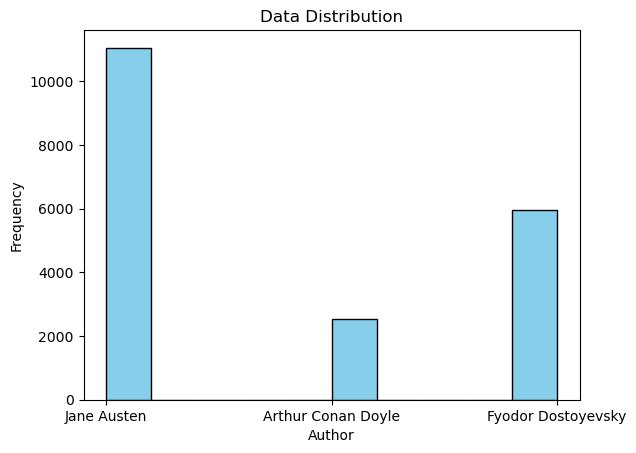

In [964]:
print(bookDf.groupby(['author']).count())
plt.hist(ll,color='skyblue', edgecolor='black')
plt.xlabel('Author')
plt.ylabel('Frequency')
plt.title('Data Distribution')

In [965]:
X_train, X_test, y_train, y_test = train_test_split(bookDf["sentences"],bookDf["author"], test_size=0.3)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.7 = 0.2

In [968]:
import re
url_pattern = re.compile(r'https?://\S+|www\.\S+')
counter = 0
for label in bookDf["sentences"]:
    label = label.lower()                                              #Lower case
    text_without_punctuation = re.sub(r'[^\w\s]', '', label)           #Remove punctuations
    text_without_urls = url_pattern.sub("", text_without_punctuation)  #Remove urls
    text_without_numbers = re.sub(r'\d', '', text_without_urls)        #Remove numbers
    bookDf["sentences"][counter] = text_without_numbers
    counter = counter+1

C:\Users\Akshay\AppData\Local\Temp\ipykernel_15352\1889923263.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bookDf["sentences"][counter] = text_without_numbers


In [970]:
# for label in bookDf["sentences"]:
#     tokenizedWord = word_tokenize(label)                                    #Tokenize words
#     stemmed_words = [porter_stemmer.stem(word) for word in tokenizedWord]   #Words stemming
#     removedStopwords = [w for w in stemmed_words if not w in stop_words]    #Removing stopwords
# #     print("Removed Stopwords",removedStopwords)
# #     print("Words Stemming",stemmed_words)
# #     print("Tokeinzed Words",tokenizedWord)
#     tokenizedWords.append(removedStopwords)

# # bookDf["tokens"] = tokenizedWords

In [971]:
bookDf.head()

,sentences,author
0,persuasion,0
1,by jane austen,0
2,,0
3,chapter,0
4,sir walter elliot of kellynch hall in somerset...,0


In [972]:
text_tfidf = tfidf_vec.fit_transform(list(X_train))
X_test_a = tfidf_vec.transform(X_test)
X_val_a =tfidf_vec.transform(X_val)
#Convert to dense array
if issparse(text_tfidf):
    text_tfidf = text_tfidf.toarray()
if issparse(X_test_a):
    X_test_a = X_test_a.toarray()
if issparse(X_val_a):
    X_val_a = X_val_a.toarray()

In [973]:
scaler = MinMaxScaler()
scaler.fit(text_tfidf)

# Transform the training set
text_tfidf = scaler.transform(text_tfidf)

# Transform the validation and test sets using the same scaler
X_val_a = scaler.transform(X_val_a)
X_test_a = scaler.transform(X_test_a)

In [974]:
num_features = text_tfidf.shape[1]
w = np.zeros((num_features, 1))
y_train_1 = y_train.to_numpy().reshape(-1,1)
b = 0

In [975]:
# Set hyperparameters
learning_rate = 0.001
num_iterations = 1000
regularization_param = 0.01
batch_size = 100
# Apply gradient descent
lossDict_1,w1, b1 = gradient_descent(text_tfidf, y_train_1, w, b, learning_rate, num_iterations,regularization_param)
lossDict_3, w3, b3 = mini_batch_gradient_descent(text_tfidf, y_train_1, w, b, learning_rate, num_iterations, regularization_param, batch_size)
lossDict_2, w2, b2 = stochastic_gradient_descent(text_tfidf, y_train_1, w, b, learning_rate, num_iterations, regularization_param)

Iteration 0, Loss: 0.6931388443891376
Iteration 100, Loss: 0.6923133590598934
Iteration 200, Loss: 0.691503469128917
Iteration 300, Loss: 0.6907084508538599
Iteration 400, Loss: 0.6899276223882154
Iteration 500, Loss: 0.689160341309977
Iteration 600, Loss: 0.6884060022929989
Iteration 700, Loss: 0.6876640349132971
Iteration 800, Loss: 0.686933901582892
Iteration 900, Loss: 0.686215095604139
Iteration 0, Loss: 0.6885553915616178
Iteration 100, Loss: 0.6877903443909388
Iteration 200, Loss: 0.6869266103125539
Iteration 300, Loss: 0.6861256230437958
Iteration 400, Loss: 0.6853977783959895
Iteration 500, Loss: 0.684626607830636
Iteration 600, Loss: 0.6839078283765292
Iteration 700, Loss: 0.683225077798052
Iteration 800, Loss: 0.682497396341972
Iteration 900, Loss: 0.6817858479409452
Iteration 0, Loss: 0.6843241574046026
Iteration 100, Loss: 0.6827846495279457
Iteration 200, Loss: 0.6816677343449016
Iteration 300, Loss: 0.6806249510050082
Iteration 400, Loss: 0.6809943632564106
Iteration 500

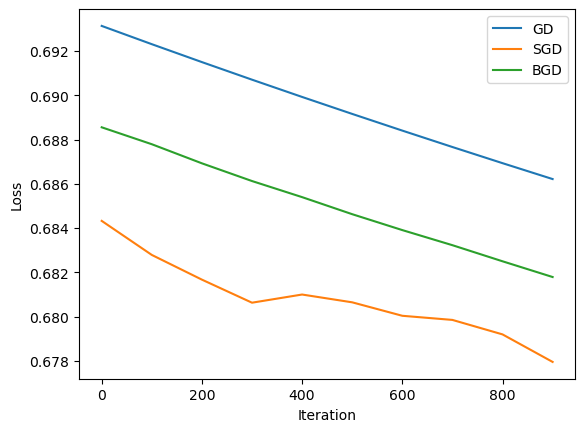

In [976]:
plt.plot(lossDict_1["iterations"],lossDict_1["loss"],label='GD')
plt.plot(lossDict_2["iterations"],lossDict_2["loss"],label='SGD')
plt.plot(lossDict_3["iterations"],lossDict_3["loss"],label='BGD')
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [977]:
y_pred_1 = predict(X_test_a,w1,b1)
y_pred_2 = predict(X_test_a,w2,b2)
y_pred_3 = predict(X_test_a,w3,b3)

In [978]:
y_test_1 = y_test.to_numpy().reshape(-1,1)
accuracyL = []
precisionL = []
recallL = []
f1L = []
predList = [y_pred_1,y_pred_2,y_pred_3]
for i in predList:
    aS,prS,recS,f1S = evaluate_model(y_test_1,i)
    accuracyL.append(aS)
    precisionL.append(prS)
    recallL.append(recS)
    f1L.append(f1S)
evaludationDf = pd.DataFrame()
evaludationDf["Optimization"] = ["GD","SGD","mini-BGD"]
evaludationDf["accuracy"] = accuracyL
evaludationDf["precision"] = precisionL
evaludationDf["recall"] = recallL
evaludationDf["f1"] = f1L

In [979]:
evaludationDf.head()

,Optimization,accuracy,precision,recall,f1
0,GD,0.64733,0.584966,0.919888,0.715157
1,SGD,0.64733,0.584966,0.919888,0.715157
2,mini-BGD,0.64733,0.584966,0.919888,0.715157


In [980]:
learning_rate = 0.001
num_iterations = 1000
batch_size = 100
GDL = []
SGDL = []
BGDL = []
# Define a range of λ values to test
lambda_values = [0.001, 0.1, 1, 10]
y_val_1 = y_val.to_numpy().reshape(-1,1)
# Loop over λ values
for reg_param in lambda_values:
    # Apply gradient descent with the current λ on the training set
#     lossDict_1,w1, b1 = gradient_descent(text_tfidf, y_train_1, w, b, learning_rate, num_iterations,regularization_param)
    lossDict_2, w2, b2 = stochastic_gradient_descent(text_tfidf, y_train_1, w, b, learning_rate, num_iterations, regularization_param)
    lossDict_3, w3, b3 = mini_batch_gradient_descent(text_tfidf, y_train_1, w, b, learning_rate, num_iterations, regularization_param, batch_size)
    # Validate on the validation set and calculate metrics (e.g., accuracy, precision, recall, F1)
    y_pred_val_1 = predict(X_val_a, w1, b1)
    y_pred_val_2 = predict(X_val_a, w2, b2)
    y_pred_val_3 = predict(X_val_a, w3, b3)
    # Store or print the performance metrics for this λ value
#     print("Regularization Parameter: {}".format(reg_param))
    accuracy_val,precision_val,recall_val,f1_val = evaluate_model(y_val_1,y_pred_val_1)
    GDL.append([accuracy_val,precision_val,recall_val,f1_val])
#     print(f"Optmization: GD, Accuracy: {accuracy_val}, Precision: {precision_val}, Recall: {recall_val}, F1: {f1_val}")
    accuracy_val,precision_val,recall_val,f1_val = evaluate_model(y_val_1,y_pred_val_2)
    SGDL.append([accuracy_val,precision_val,recall_val,f1_val])
#     print(f"Optmization: SGD, Accuracy: {accuracy_val}, Precision: {precision_val}, Recall: {recall_val}, F1: {f1_val}")
    accuracy_val,precision_val,recall_val,f1_val = evaluate_model(y_val_1,y_pred_val_3)
    BGDL.append([accuracy_val,precision_val,recall_val,f1_val])
#     print(f"Optmization: Mini-BGD, Accuracy: {accuracy_val}, Precision: {precision_val}, Recall: {recall_val}, F1: {f1_val}")
#     print()

Iteration 0, Loss: 0.6805180971248442
Iteration 100, Loss: 0.6800753638904935
Iteration 200, Loss: 0.6794499573762988
Iteration 300, Loss: 0.6786399935027501
Iteration 400, Loss: 0.678217871580558
Iteration 500, Loss: 0.6776228516141953
Iteration 600, Loss: 0.6767805394736989
Iteration 700, Loss: 0.6759412255006918
Iteration 800, Loss: 0.6744243227969212
Iteration 900, Loss: 0.6734475697513886
Iteration 0, Loss: 0.6769552644787831
Iteration 100, Loss: 0.6761868273611266
Iteration 200, Loss: 0.6753734256014817
Iteration 300, Loss: 0.674638690602061
Iteration 400, Loss: 0.6738293358149102
Iteration 500, Loss: 0.6730917564175082
Iteration 600, Loss: 0.6724329760493483
Iteration 700, Loss: 0.6716912963499286
Iteration 800, Loss: 0.6709666588624805
Iteration 900, Loss: 0.6702879176963183
Iteration 0, Loss: 0.6734328781657842
Iteration 100, Loss: 0.6730681026832877
Iteration 200, Loss: 0.6726691383998302
Iteration 300, Loss: 0.6717672245358155
Iteration 400, Loss: 0.6710420787902456
Iteratio

In [981]:
column_names = ["0.001","0.01", "0.1", "1"]

# Create DataFrames
GDL_df = pd.DataFrame(GDL, columns=column_names)
SGDL_df = pd.DataFrame(SGDL, columns=column_names)
BGDL_df = pd.DataFrame(BGDL, columns=column_names)

# Concatenate DataFrames along columns
# result_df = pd.concat([GDL_df.values.T, SGDL_df.values.T, BGDL_df.values.T], axis=1)

In [982]:
GDL_df = pd.DataFrame(GDL_df.values.T, columns=column_names, index=['GD_accuracy', 'GD_precision', 'GD_recall', 'GD_f1'])
SGDL_df = pd.DataFrame(SGDL_df.values.T, columns=column_names, index=['SGD_accuracy', 'SGD_precision','SGD_recall', 'SGD_f1'])
BGDL_df = pd.DataFrame(BGDL_df.values.T, columns=column_names, index=['BGD_accuracy', 'BGD_precision', 'BGD_recall', 'BGD_f1'])
result_df = pd.concat([GDL_df, SGDL_df, BGDL_df], axis=0)

In [984]:
result_df

,0.001,0.01,0.1,1
GD_accuracy,0.650483,0.654285,0.656040,0.657795
GD_precision,0.602740,0.607794,0.610794,0.612842
GD_recall,0.895467,0.894542,0.889917,0.891767
GD_f1,0.720506,0.723802,0.724398,0.726451
SGD_accuracy,0.650190,0.654285,0.656332,0.657502
SGD_precision,0.602365,0.607930,0.611182,0.612452
SGD_recall,0.895467,0.893617,0.889917,0.891767
SGD_f1,0.720238,0.723596,0.724670,0.726177
BGD_accuracy,0.650190,0.653992,0.656040,0.657502
BGD_precision,0.602365,0.607412,0.610794,0.612452


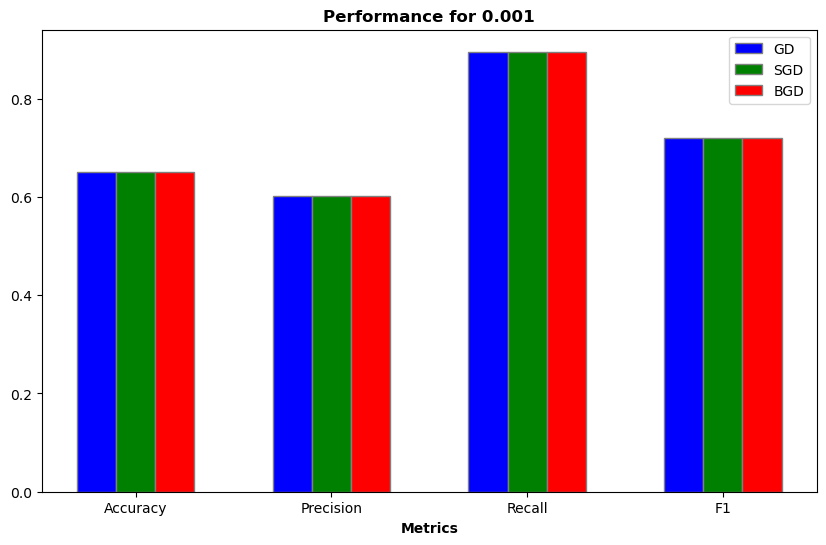

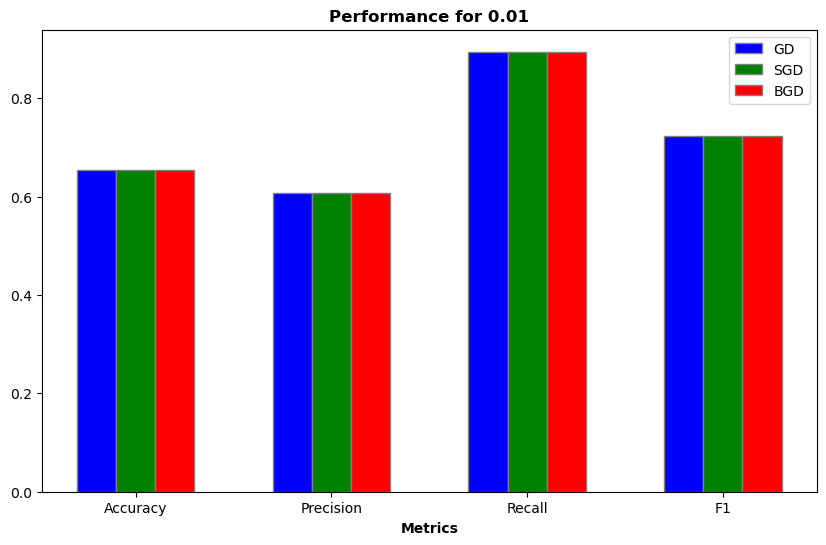

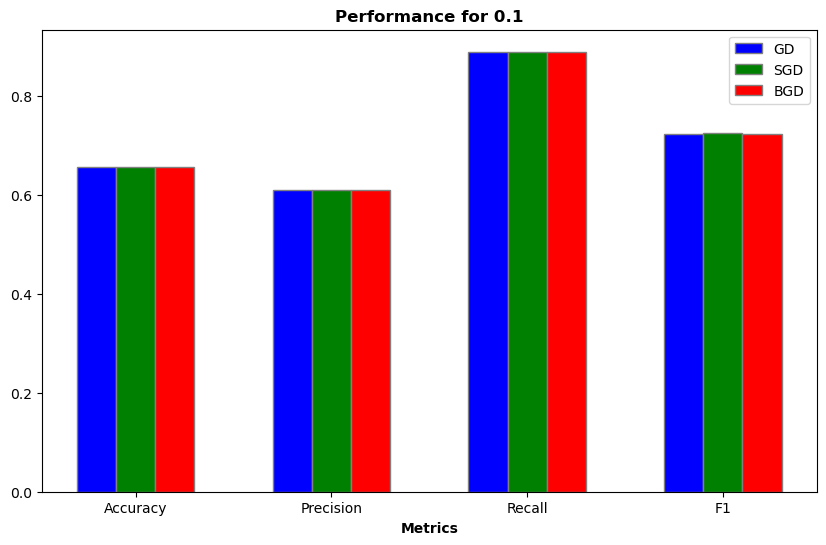

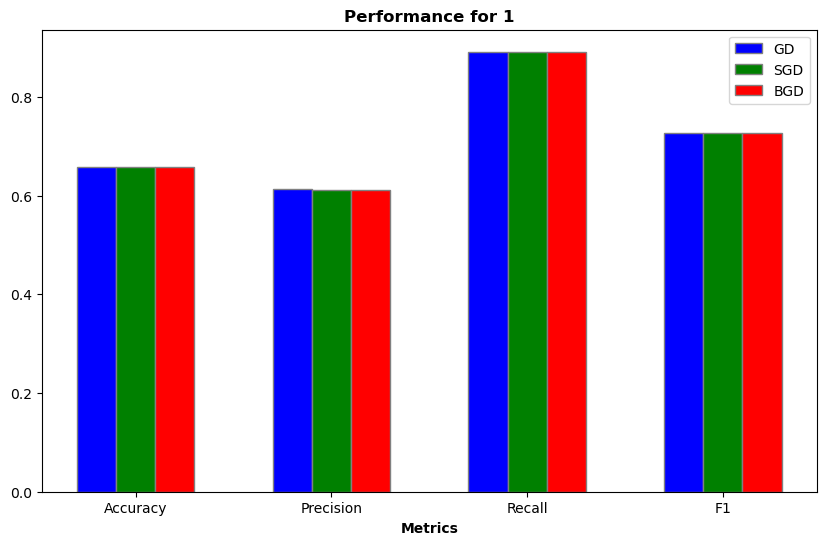

In [983]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming result_df is your DataFrame with the structure mentioned above

# Extract data for each optimization method
gd_data = result_df.loc[['GD_accuracy', 'GD_precision', 'GD_recall', 'GD_f1']]
sgd_data = result_df.loc[['SGD_accuracy', 'SGD_precision', 'SGD_recall', 'SGD_f1']]
bgd_data = result_df.loc[['BGD_accuracy', 'BGD_precision', 'BGD_recall', 'BGD_f1']]

# Set column names and values
columns = column_names

# Set width of the bars
bar_width = 0.2

# Set positions of bar on X axis
r1 = np.arange(len(columns))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Plotting
for i, column in enumerate(columns):
    plt.figure(figsize=(10, 6))
    plt.bar(r1, gd_data.loc[:, column], color='b', width=bar_width, edgecolor='grey', label='GD')
    plt.bar(r2, sgd_data.loc[:, column], color='g', width=bar_width, edgecolor='grey', label='SGD')
    plt.bar(r3, bgd_data.loc[:, column], color='r', width=bar_width, edgecolor='grey', label='BGD')
    
    plt.xlabel('Metrics', fontweight='bold')
    plt.xticks([r + bar_width for r in range(len(columns))], ['Accuracy', 'Precision', 'Recall', 'F1'])
    plt.title(f'Performance for {column}', fontweight='bold')
    plt.legend()
    plt.show()


### Analysis:

#### Accuracy:

For all three optimization algorithms (GD, SGD, BGD), the accuracy increases with increasing lambda values (0.001 < 0.01 < 0.1 < 1).
The highest accuracy is observed for lambda = 1 for all three algorithms.
Precision:

Similar to accuracy, precision tends to increase with higher lambda values.
The highest precision is observed for lambda = 1 across all three algorithms.
Recall:

The recall values show a decreasing trend as lambda values increase.
For each algorithm, the recall is the highest for lambda = 0.001.
F1 Score:

F1 score generally follows a pattern similar to accuracy and precision.
The highest F1 score is observed for lambda = 1 for all three optimization algorithms.
#### Conclusion:

Lambda values play a crucial role in the performance of the model. In this case, a higher lambda (1) seems to yield better results for accuracy, precision, and F1 score.
The optimal lambda may vary for different metrics and optimization algorithms.
It's essential to consider a balance between precision and recall based on the specific goals and requirements of the application.